> ### Project 5 Flight Price Prediction**

By: Yashshree Baviskar



In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Flight Prediction dataset Excel file using pandas
df = pd.read_csv('Flight_dataset_Price.csv')

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

No of Rows: 2671
No of Columns: 12


,Unnamed: 0,Airline,Class,Aeroplane,Date,Departure_Time,Arrival_Time,Source,Destination,Stops,Duration,Price
0,0,Vistara,Economy Class,UK-981,"Tue, 21 Jun 2022",21:30,23:30,New Delhi,Mumbai,Non Stop,2h 00m,8578
1,1,Vistara,Economy Class,UK-993,"Tue, 21 Jun 2022",12:50,15:00,New Delhi,Mumbai,Non Stop,2h 10m,8578
2,2,Vistara,Economy Class,UK-951,"Tue, 21 Jun 2022",14:20,16:30,New Delhi,Mumbai,Non Stop,2h 10m,8578
3,3,Vistara,Economy Class,UK-933,"Tue, 21 Jun 2022",15:30,17:40,New Delhi,Mumbai,Non Stop,2h 10m,8578
4,4,Vistara,Economy Class,UK-985,"Tue, 21 Jun 2022",19:45,21:55,New Delhi,Mumbai,Non Stop,2h 10m,8578


In [4]:
df.drop(columns='Unnamed: 0', inplace =True)

In [5]:
# lets sort columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Price'], object: ['Airline', 'Class', 'Aeroplane', 'Date', 'Departure_Time', 'Arrival_Time', 'Source', 'Destination', 'Stops', 'Duration']}

#### Comment :
- Training dataset contain 2671 records and 11 features.
- Our Target variable is **Price**. We gone predict flight prices using **Various Regression Algorithms.**
- Some feature with date and time related columns are mention with object datatype. **We gone convert them into datetime datatype format along with going to perform some feature engineering over them to create few new columns of our interest.**

#### Data Integrity Check

- **Dataset can contain whitespaces, missing value, duplicates entries, let investigate integrity of data before proceeding for further analysis.**

In [6]:
df.duplicated().sum()

110

In [7]:
df=df.drop_duplicates(subset=None,inplace=False)

In [8]:
df.shape

(2561, 11)

**Data contain duplicate values and for further analysis we are dropping duplicates value.**

- **Missing value check**

In [9]:
df.isin(['','?','-','null','NA','']).sum().any()

False

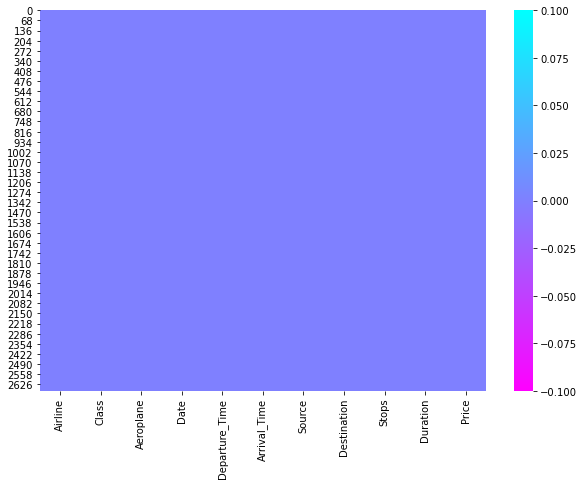

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cmap= 'cool_r')
plt.show()

### **Data Preprocessing**

**1.Conversion of Duration column hr & Minutes format to Minutes**

In [11]:
df['Duration'] = df['Duration'].map(lambda x : x.replace('05m','5m'))

In [12]:
# Conversion of Duration column from hr & Minutes format to Minutes
df['Duration'] = df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

# convert this column into a numeric datatypes
df['Duration']= pd.to_numeric(df['Duration'])

**2. Feature Engineering on 'Date' Column**

In [13]:
df['Week_Day']= df['Date'].map(lambda x :x[:3])

In [14]:
df['Journey_Day']= df['Date'].map(lambda x :x[4:])

In [15]:
df['Journey_Month']= df['Journey_Day'].map(lambda x :x.split()[1])

In [16]:
df['Journey_Date']= df['Journey_Day'].map(lambda x :x.split()[0])

In [17]:
df['Journey_Year']= df['Journey_Day'].map(lambda x :x.split()[2])

In [18]:
df.dtypes

Airline           object
Class             object
Aeroplane         object
Date              object
Departure_Time    object
Arrival_Time      object
Source            object
Destination       object
Stops             object
Duration           int64
Price              int64
Week_Day          object
Journey_Day       object
Journey_Month     object
Journey_Date      object
Journey_Year      object
dtype: object

In [19]:
df['Journey_Date'] = df['Journey_Date'].astype(int)

**3. Feature Engineering on 'Depature_Time' Column**

In [20]:
# Extracting Hours from Dep_Time column
df['Dep_Hour']=pd.to_datetime(df['Departure_Time']).dt.hour

# Extracting Minutes from Dep_Time column
df['Dep_Min']=pd.to_datetime(df['Departure_Time']).dt.minute

# Dropping Dep_Time column
df.drop("Departure_Time",axis=1,inplace=True)

**4. Feature Engineering on 'Arrival_Time' Column**

In [21]:
df['Arrival_Hour']= df['Arrival_Time'].map(lambda x :x.split(':')[0])

In [22]:
df['Arrival_Min']= df['Arrival_Time'].map(lambda x :x.split(':')[1][:2])

In [23]:
df['Arrival_Hour'] = df['Arrival_Hour'].astype(int)

In [24]:
df['Arrival_Min'] = df['Arrival_Min'].astype(int)

In [25]:
df.head()

,Airline,Class,Aeroplane,Date,Arrival_Time,Source,Destination,Stops,Duration,Price,Week_Day,Journey_Day,Journey_Month,Journey_Date,Journey_Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Vistara,Economy Class,UK-981,"Tue, 21 Jun 2022",23:30,New Delhi,Mumbai,Non Stop,120,8578,Tue,21 Jun 2022,Jun,21,2022,21,30,23,30
1,Vistara,Economy Class,UK-993,"Tue, 21 Jun 2022",15:00,New Delhi,Mumbai,Non Stop,130,8578,Tue,21 Jun 2022,Jun,21,2022,12,50,15,0
2,Vistara,Economy Class,UK-951,"Tue, 21 Jun 2022",16:30,New Delhi,Mumbai,Non Stop,130,8578,Tue,21 Jun 2022,Jun,21,2022,14,20,16,30
3,Vistara,Economy Class,UK-933,"Tue, 21 Jun 2022",17:40,New Delhi,Mumbai,Non Stop,130,8578,Tue,21 Jun 2022,Jun,21,2022,15,30,17,40
4,Vistara,Economy Class,UK-985,"Tue, 21 Jun 2022",21:55,New Delhi,Mumbai,Non Stop,130,8578,Tue,21 Jun 2022,Jun,21,2022,19,45,21,55


In [26]:
Categorical = ['Airline','Class','Week_Day','Stops','Source','Destination','Journey_Month','Journey_Year']

In [27]:
pd.set_option('display.max_rows',None)
for i in Categorical :
    print(i)
    print(df[i].value_counts())
    print('='*100)

Airline
Vistara                    509
IndiGo                     481
Vistara Premium Economy    471
Air India                  248
Vistara Business           235
Go First                   197
SpiceJet                   172
Air India Business         158
Air Asia                    90
Name: Airline, dtype: int64
Class
Economy Class            1697
Premium Economy Class     471
Business Class            393
Name: Class, dtype: int64
Week_Day
Tue    693
Wed    456
Sun    338
Sat    317
Mon    282
Fri    266
Thu    209
Name: Week_Day, dtype: int64
Stops
1 Stop       1603
Non Stop      943
2 Stop(s)      15
Name: Stops, dtype: int64
Source
New Delhi    2561
Name: Source, dtype: int64
Destination
Mumbai    2561
Name: Destination, dtype: int64
Journey_Month
Jun    1940
Jul     621
Name: Journey_Month, dtype: int64
Journey_Year
2022    2561
Name: Journey_Year, dtype: int64


In [28]:
# Dropping Unnecessary columns
df.drop(columns=['Date','Journey_Year','Arrival_Time','Source','Destination'], inplace= True)

In [29]:
df.drop(columns=['Journey_Day'], inplace= True)

### Statsical Matrix

In [30]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Duration,2561.000000,496.507224,410.137568,110.000000,135.000000,365.000000,730.000000,1705.000000
Price,2561.000000,15241.439282,9011.635634,5896.000000,8580.000000,12622.000000,17715.000000,63928.000000
Journey_Date,2561.000000,20.643889,9.825732,1.000000,21.000000,25.000000,28.000000,30.000000
Dep_Hour,2561.000000,13.029285,5.484595,0.000000,8.000000,13.000000,18.000000,23.000000
Dep_Min,2561.000000,27.805545,17.082259,0.000000,15.000000,30.000000,45.000000,55.000000
Arrival_Hour,2561.000000,14.823897,6.175860,0.000000,10.000000,16.000000,20.000000,23.000000
Arrival_Min,2561.000000,24.726669,17.280529,0.000000,10.000000,25.000000,40.000000,55.000000


In [31]:
df.describe(include=object).style.background_gradient(cmap='summer_r')

,Airline,Class,Aeroplane,Stops,Week_Day,Journey_Month
count,2561,2561,2561,2561,2561,2561
unique,9,3,302,3,7,2
top,Vistara,Economy Class,UK-985,1 Stop,Tue,Jun
freq,509,1697,34,1603,693,1940


## Exploratory Data Analysis

#### **Exploring Airline Types**

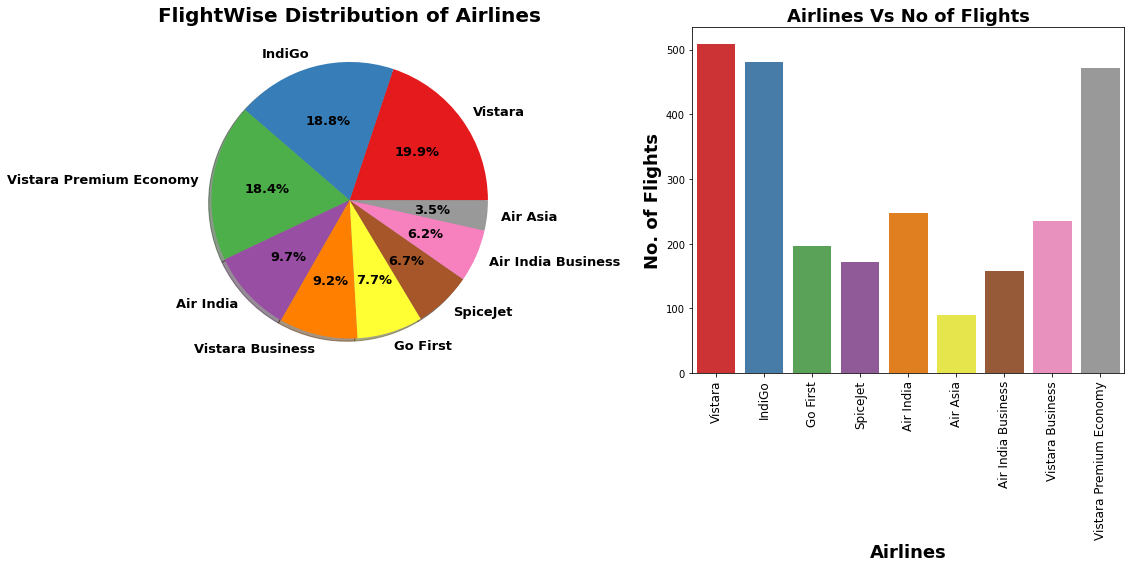

In [71]:
# Pie & count plot of Airline types
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Airline'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('FlightWise Distribution of Airlines', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Airline',data=df,ax=ax[1])
ax[1].set_title('Airlines Vs No of Flights',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Airlines",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Flights",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,rotation= 90)
plt.tight_layout()
plt.show()

#### Observation:
- **We can see maximum number of flights run by Vistara Premium Economy while minimum Flights run by Spicejet.**
- **Around 14% of flights of Business Class.**

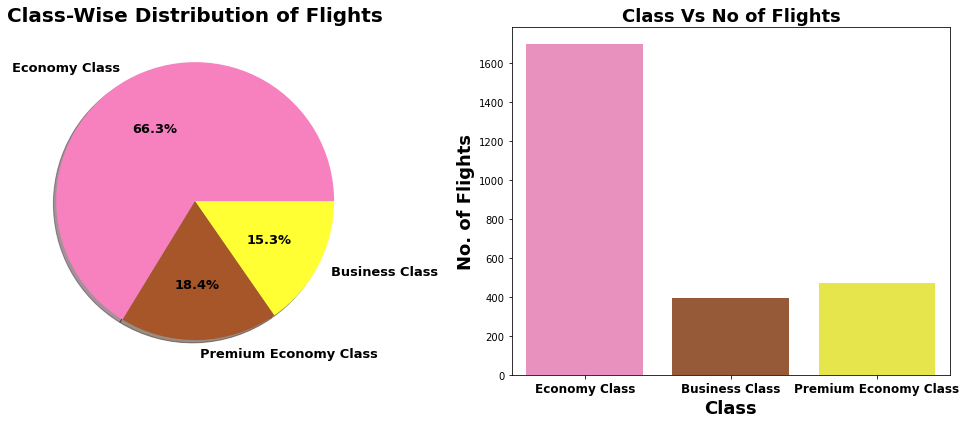

In [72]:
# Counting class type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1_r')
f,ax=plt.subplots(1,2,figsize=(14,6))
df['Class'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Class-Wise Distribution of Flights', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Class',data=df,ax=ax[1])
ax[1].set_title('Class Vs No of Flights',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Class",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Flights",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **66.3% flights are of Ecomony class, as they are low cost of flight & most of people prefer it.**
- **There are more Premuim Ecomony flights than business class flights . It not  because Business class is less costlier than Premuim Ecomony class.**

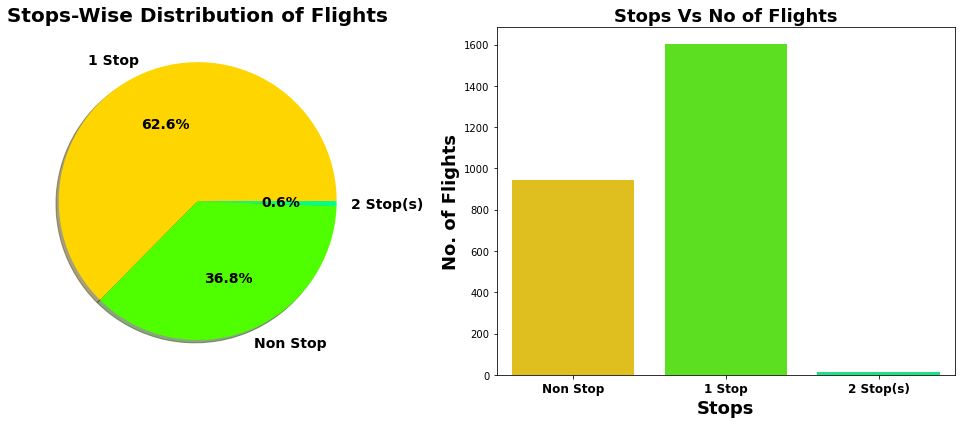

In [73]:
# Counting No of stops
plt.rcParams["figure.autolayout"] = True
sns.set_palette('hsv')
f,ax=plt.subplots(1,2,figsize=(14,6))
df['Stops'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':14,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Stops-Wise Distribution of Flights', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Stops',data=df,ax=ax[1])
ax[1].set_title('Stops Vs No of Flights',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Stops",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Flights",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **62.6% flights take single stop in there way from New Dehli to Mumbai.It is also possible that these flights may have high flight duration compare to Non-stop Flight**
- **36.8% of flights do not have any stop in there route.**

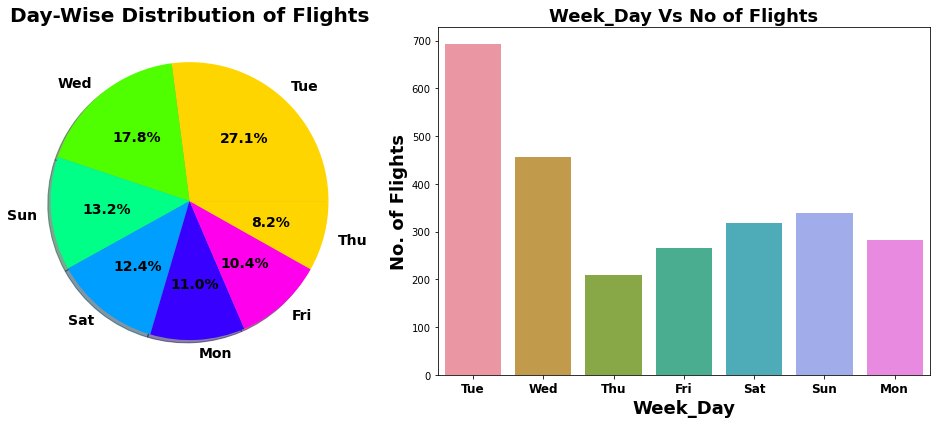

In [75]:
# Counting No of stops
plt.rcParams["figure.autolayout"] = True
sns.set_palette('hsv')
f,ax=plt.subplots(1,2,figsize=(14,6))
df['Week_Day'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':14,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Day-Wise Distribution of Flights', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Week_Day',data=df,ax=ax[1])
ax[1].set_title('Week_Day Vs No of Flights',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Week_Day",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Flights",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

- **On Tuesday Maximum flights run while on Thrusday minimum flights run**

**It will be interesting to investigate variation of fare as per different week days.**

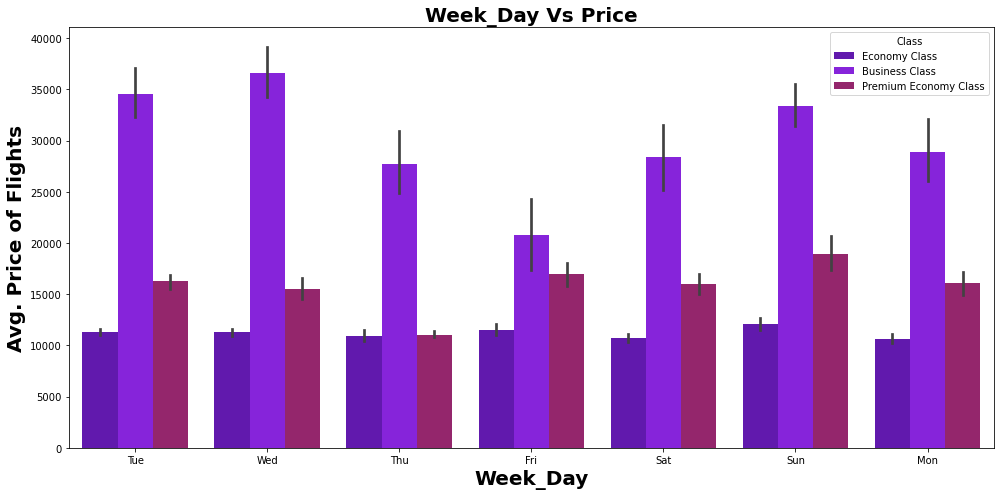

In [77]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot')
plt.figure(figsize =(14,7))
sns.barplot(x=df['Week_Day'],y=df['Price'],hue=df['Class'])
plt.title("Week_Day Vs Price",fontsize=20,fontweight ='bold')
plt.xlabel('Week_Day',fontsize = 20,fontweight ='bold')
plt.ylabel('Avg. Price of Flights',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **Maximum Avg. Fare for Business Flights is on Wedsday while minimum Avg. Fare for Business flights on Thursday.**
- **For Ecomony Flights & Premium Ecomony Flights: Minimum Avg. Fare on Friday.**
- **For Ecomony Flights & Premium Ecomony Flights: Maximum Avg. Fare on Monday.**

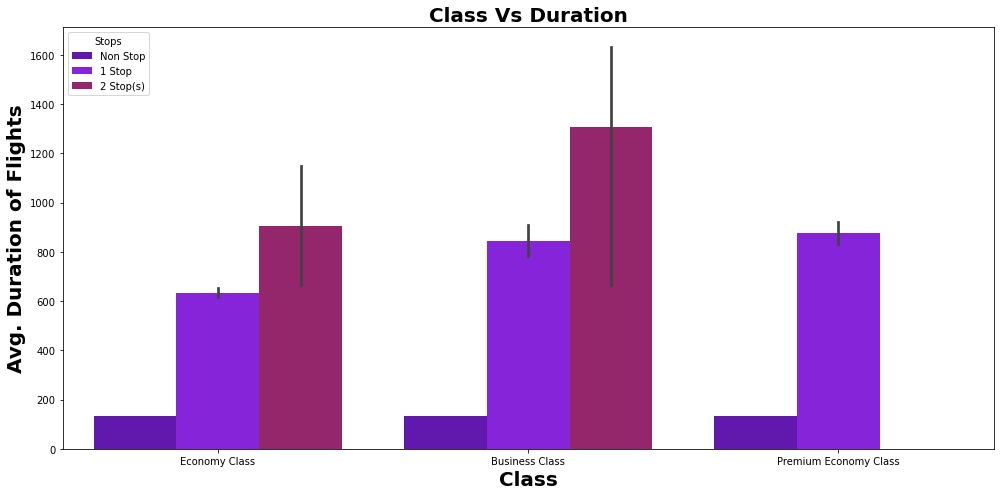

In [78]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot')
plt.figure(figsize =(14,7))
sns.barplot(x=df['Class'],y=df['Duration'],hue=df['Stops'])
plt.title("Class Vs Duration",fontsize=20,fontweight ='bold')
plt.xlabel('Class',fontsize = 20,fontweight ='bold')
plt.ylabel('Avg. Duration of Flights',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **As Number of Stops increase the duration of flights increases.**
- **As per Class of flight Maximum Avg. Duration of flight is for Business class.** 

In [80]:
df.head()

,Airline,Class,Aeroplane,Stops,Duration,Price,Week_Day,Journey_Day,Journey_Date,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Vistara,Economy Class,UK-981,Non Stop,120,8578,Tue,21 Jun 2022,21,Jun,21,30,23,30
1,Vistara,Economy Class,UK-993,Non Stop,130,8578,Tue,21 Jun 2022,21,Jun,12,50,15,0
2,Vistara,Economy Class,UK-951,Non Stop,130,8578,Tue,21 Jun 2022,21,Jun,14,20,16,30
3,Vistara,Economy Class,UK-933,Non Stop,130,8578,Tue,21 Jun 2022,21,Jun,15,30,17,40
4,Vistara,Economy Class,UK-985,Non Stop,130,8578,Tue,21 Jun 2022,21,Jun,19,45,21,55


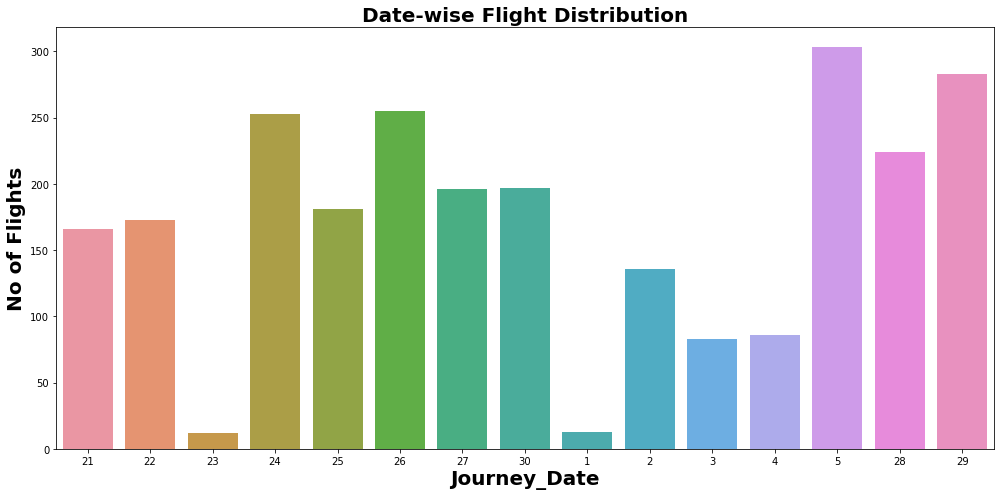

In [81]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('mako')
plt.figure(figsize =(14,7))
sns.countplot(x=df['Journey_Date'])
plt.title("Date-wise Flight Distribution",fontsize=20,fontweight ='bold')
plt.xlabel('Journey_Date',fontsize = 20,fontweight ='bold')
plt.ylabel('No of Flights',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

**We can see those Maximum flights schedule on 5th July 2022 & Minimum flights schedule on 23 June 2022.**

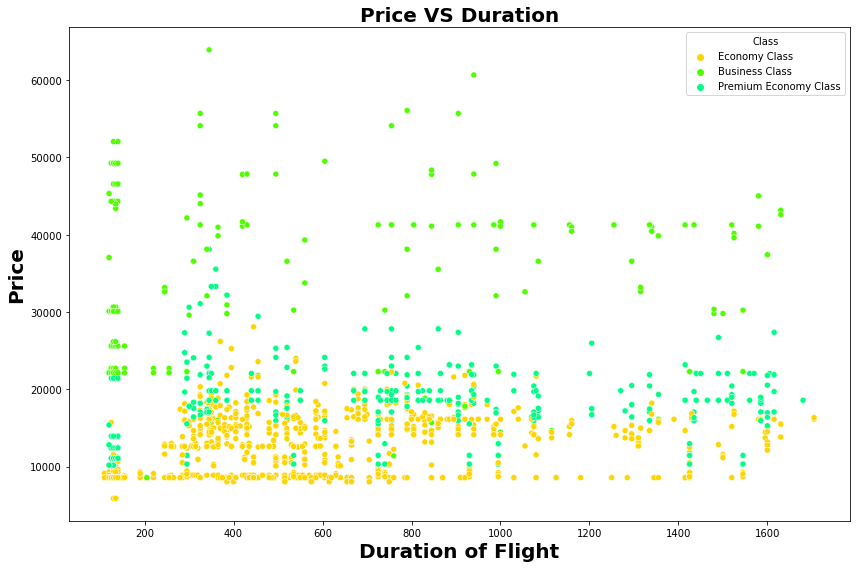

In [91]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('hsv')
plt.figure(figsize =(12,8))
sns.scatterplot(y=df['Price'],x=df['Duration'], hue= df['Class'])
plt.title("Price VS Duration",fontsize=20,fontweight ='bold')
plt.xlabel('Duration of Flight',fontsize = 20,fontweight ='bold')
plt.ylabel('Price',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

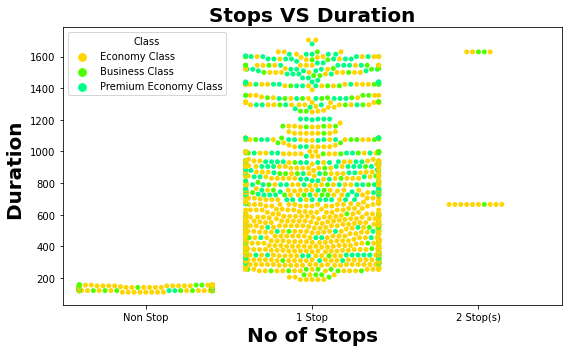

In [93]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('hsv')
plt.figure(figsize =(8,5))
sns.swarmplot(y=df['Duration'],x=df['Stops'], hue =df['Class'])
plt.title("Stops VS Duration",fontsize=20,fontweight ='bold')
plt.xlabel('No of Stops',fontsize = 20,fontweight ='bold')
plt.ylabel('Duration ',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

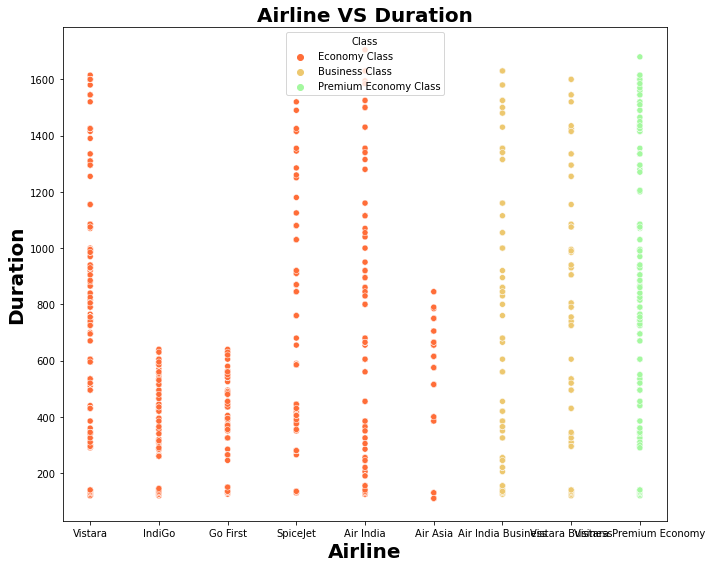

In [92]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
plt.figure(figsize =(10,8))
sns.scatterplot(x=df['Airline'],y=df['Duration'], hue =df['Class'])
plt.title("Airline VS Duration",fontsize=20,fontweight ='bold')
plt.xlabel('Airline',fontsize = 20,fontweight ='bold')
plt.ylabel('Duration',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

## ***Feature Engineering***

### 1. Outliers detection and Removal

- **As Features 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Journey_Day', 'Journey_Month' are  time-data-sequences in nature. So concept of outliers doesnot applicable to them.**
- **Concept of Outliers is only Valid for Continous Numerical data.**

In [32]:
Numerical_Features = ['Duration', 'Price']

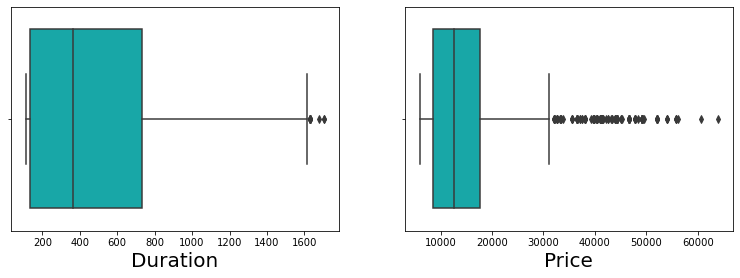

In [33]:
plt.figure(figsize=(20,14),facecolor='white')
plotnumber=1

for column in Numerical_Features:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [34]:
from scipy.stats import zscore
z = np.abs(zscore(df[Numerical_Features]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (2561, 13)
Shape of the dataframe after removing outliers:  (2488, 13)
Percentage of data loss post outlier removal:  2.850449043342444


**We have data loss of 2.85%, which is acceptable.**

### 2. Skewness Detection and Transformation in Numerical Features

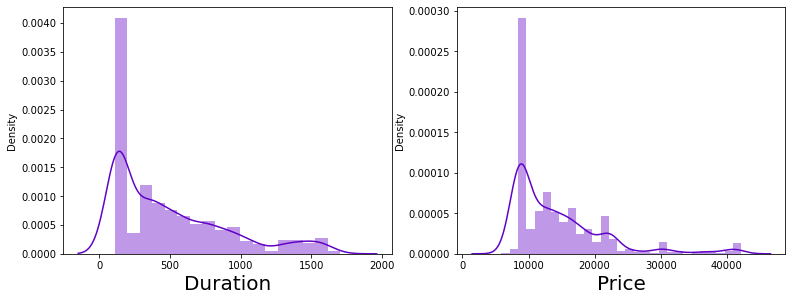

In [35]:
plt.figure(figsize=(20,10),facecolor='white')
sns.set_palette('gnuplot')
plotnum=1
for col in Numerical_Features:
    if plotnum<=6:
        plt.subplot(2,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [36]:
df[Numerical_Features].skew()

Duration    1.092876
Price       1.807603
dtype: float64

In [37]:
df['Duration'] = np.log1p(df['Duration'])

In [38]:
df[Numerical_Features].skew()

Duration    0.108462
Price       1.807603
dtype: float64

### 3. Corrleation 

In [39]:
df.corr()

,Duration,Price,Journey_Date,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Duration,1.000000,0.280458,0.104718,0.005322,-0.045781,-0.051393,-0.016281
Price,0.280458,1.000000,-0.176691,0.039471,-0.023210,0.111483,-0.038018
Journey_Date,0.104718,-0.176691,1.000000,-0.035924,-0.019199,-0.022874,0.013496
Dep_Hour,0.005322,0.039471,-0.035924,1.000000,0.056797,0.114071,-0.105183
Dep_Min,-0.045781,-0.023210,-0.019199,0.056797,1.000000,0.035581,0.057380
Arrival_Hour,-0.051393,0.111483,-0.022874,0.114071,0.035581,1.000000,-0.008638
Arrival_Min,-0.016281,-0.038018,0.013496,-0.105183,0.057380,-0.008638,1.000000


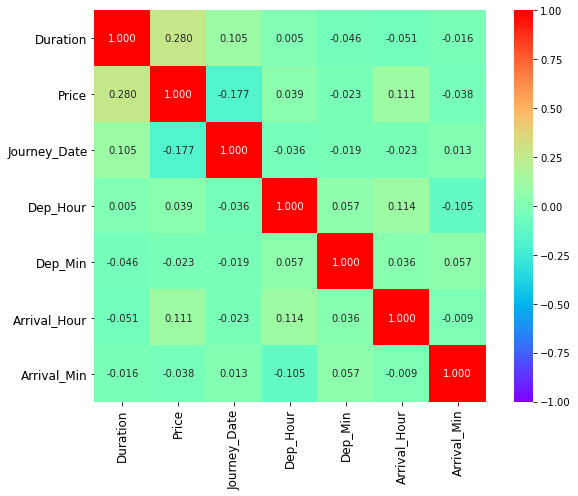

In [40]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap= 'rainbow')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation= 0)
plt.tight_layout()
plt.show()

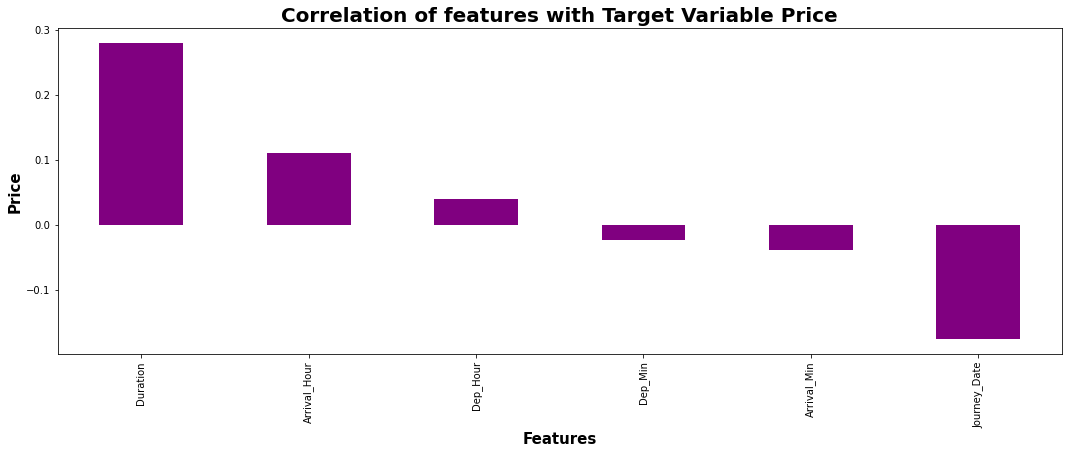

In [41]:
plt.figure(figsize = (18,6))
df.corr()['Price'].drop(['Price']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Price',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Price',fontsize = 20,fontweight='bold')
plt.show()

### 4. Encoding categorical data

In [42]:
# lets sort columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int32: ['Journey_Date', 'Arrival_Hour', 'Arrival_Min'], int64: ['Price', 'Dep_Hour', 'Dep_Min'], float64: ['Duration'], object: ['Airline', 'Class', 'Aeroplane', 'Stops', 'Week_Day', 'Journey_Month']}

In [43]:
Categorical_Features = ['Airline', 'Class', 'Aeroplane', 'Stops', 'Week_Day', 'Journey_Month']

In [44]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_Features:
    df[i] = le.fit_transform(df[i])
df.head()

,Airline,Class,Aeroplane,Stops,Duration,Price,Week_Day,Journey_Month,Journey_Date,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,6,1,298,2,4.795791,8578,5,1,21,21,30,23,30
1,6,1,300,2,4.875197,8578,5,1,21,12,50,15,0
2,6,1,287,2,4.875197,8578,5,1,21,14,20,16,30
3,6,1,282,2,4.875197,8578,5,1,21,15,30,17,40
4,6,1,299,2,4.875197,8578,5,1,21,19,45,21,55


- **We have sucessfully converted Categorical variable in numerical variable using label encoder**

 ### 5. Checking Multicollinearity between features using variance_inflation_factor

In [45]:
# Splitting data in target and dependent feature
X = df.drop(['Price'], axis=1)
Y = df['Price']

In [46]:
df.head()

,Airline,Class,Aeroplane,Stops,Duration,Price,Week_Day,Journey_Month,Journey_Date,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,6,1,298,2,4.795791,8578,5,1,21,21,30,23,30
1,6,1,300,2,4.875197,8578,5,1,21,12,50,15,0
2,6,1,287,2,4.875197,8578,5,1,21,14,20,16,30
3,6,1,282,2,4.875197,8578,5,1,21,15,30,17,40
4,6,1,299,2,4.875197,8578,5,1,21,19,45,21,55


In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif["Features"] = df.columns
vif

,VIF values,Features
0,15.243765,Airline
1,8.636707,Class
2,8.405228,Aeroplane
3,1.812689,Stops
4,31.831939,Duration
5,8.689199,Price
6,4.294138,Week_Day
7,66.975235,Journey_Month
8,86.791342,Journey_Date
9,6.946638,Dep_Hour


**Journey_Date and Journey_Month are highly collinear with each other. So we will drop journey month from data.**

In [48]:
df.drop(['Journey_Month'], axis=1, inplace =True)

### 6. Standard Scaling

In [50]:
# Splitting data in target and dependent feature
X = df.drop(['Price'], axis=1)
Y = df['Price']

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

**Checking Multicollinearity between features using variance_inflation_factor after removing multicollinearity**

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,2.614476,Airline
1,1.334981,Class
2,2.393468,Aeroplane
3,4.487721,Stops
4,4.391623,Duration
5,1.028280,Week_Day
6,1.058047,Journey_Date
7,1.054950,Dep_Hour
8,1.054937,Dep_Min
9,1.068581,Arrival_Hour


**We can see multicollinearity is within limit.**

## **Machine Learning Model Building**

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=0.3)
print('Training Feature Matrix Size:', X_train.shape)
print('Training Target Vector Size :', Y_train.shape)
print('Test Feature Matrix Size:', X_test.shape)
print('Test Target Vector Size:', Y_test.shape)

Training Feature Matrix Size: (1741, 11)
Training Target Vector Size : (1741,)
Test Feature Matrix Size: (747, 11)
Test Target Vector Size: (747,)


### **Finding best Random state**

In [56]:
maxR2_score=0
maxRS=0
for i in range(50,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.4907015494301248 on Random_state 287


### **Linear Regression**

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 287, test_size=0.25)
lin_reg= LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_test)
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error :
Mean absolute error : 4002.1921561308695
Mean squared error : 27952391.253184095
Root Mean squared error : 5287.002104518599
 R2 Score :
49.070154943012476


In [58]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.06306054357285615
Difference in R2 & CV Score: 42.76410058572686


### **Random Forest Regressor**

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 60, test_size=0.33)
rfc = RandomForestRegressor()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
print('\033[1m'+ 'Error of Random Forest Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Random Forest Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Random Forest Regressor:
Mean absolute error : 1147.236136224076
Mean squared error : 4742093.943375699
Root Mean squared error : 2177.6349426328784
R2 Score of Random Forest Regressor :
89.94015869083671


In [60]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',rfc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.6399349280460909
Difference in R2 & CV Score: 25.94666588622762


### **Decision Tree Regressor**

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 60, test_size=0.33)
dtc = DecisionTreeRegressor()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)
print('\033[1m'+ 'Error of Decision Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Decision Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Decision Tree Regressor:
Mean absolute error : 1107.147201946472
Mean squared error : 6872305.638686132
Root Mean squared error : 2621.508275532643
R2 Score of Decision Tree Regressor :
85.42114412350999


In [62]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',dtc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.5323240231562202
Difference in R2 & CV Score: 32.18874180788797


### **Extra Trees Regressor**

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 60, test_size=0.33)
etc = ExtraTreesRegressor()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)
print('\033[1m'+ 'Error of Extra Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Extra Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Extra Tree Regressor:
Mean absolute error : 1127.3223844282238
Mean squared error : 7172717.755474453
Root Mean squared error : 2678.193001909021
R2 Score of Extra Tree Regressor :
84.78385218911843


In [64]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(etc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',etc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.6685974067162478
Difference in R2 & CV Score: 17.924111517493657


### **XGB Regressor**

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 60, test_size=0.33)
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_test)
print('\033[1m'+ 'Error of XGB Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of XGB Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of XGB Regressor:
Mean absolute error : 1258.1237008867472
Mean squared error : 5038598.295239574
Root Mean squared error : 2244.6822258929155
R2 Score of XGB Regressor :
89.31115665864509


In [66]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',xgb,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) :

Mean CV Score : 0.6239931656410264
Difference in R2 & CV Score: 26.911840094542455


###  **Gradient Boosting Regressor**

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
X_train,X_test,Y_train,Y_test=train_test_split(X_scale,Y,test_size=.33,random_state=60)
GBR=GradientBoostingRegressor()
GBR.fit(X_train,Y_train)
y_pred = GBR.predict(X_test)
print('\033[1m'+ 'Error of Gradient Boosting Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Gradient Boosting Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Gradient Boosting Regressor:
Mean absolute error : 1515.589925036542
Mean squared error : 5277834.301348992
Root Mean squared error : 2297.3537606013124
R2 Score of Gradient Boosting Regressor :
88.80364325093188


In [137]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(GBR, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',GBR,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(Y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.6759997392699406
Difference in R2 & CV Score: 21.18860742687889


**As here we can see that we have R2 score of 89.94% for Random Forest Regressor Model which is maximum among all models. We will select Random forest as best model and perform hyperparameter tuning over it.**

# Hyper Parameter Tuning : GridSearchCV

In [68]:
from sklearn.model_selection import GridSearchCV

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=287, test_size=0.25)

In [79]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [80]:
parameter = {'n_estimators':[90,100,125],
             'bootstrap':[True, False],
              'max_depth':[4,6,8,10, None],
             'max_features':['auto','log2','sqrt'] }

In [81]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose =10)

In [82]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5; 1/90] START bootstrap=True, max_depth=4, max_features=auto, n_estimators=90
[CV 1/5; 1/90] END bootstrap=True, max_depth=4, max_features=auto, n_estimators=90;, score=0.820 total time=   0.3s
[CV 2/5; 1/90] START bootstrap=True, max_depth=4, max_features=auto, n_estimators=90
[CV 2/5; 1/90] END bootstrap=True, max_depth=4, max_features=auto, n_estimators=90;, score=0.822 total time=   0.2s
[CV 3/5; 1/90] START bootstrap=True, max_depth=4, max_features=auto, n_estimators=90
[CV 3/5; 1/90] END bootstrap=True, max_depth=4, max_features=auto, n_estimators=90;, score=0.830 total time=   0.2s
[CV 4/5; 1/90] START bootstrap=True, max_depth=4, max_features=auto, n_estimators=90
[CV 4/5; 1/90] END bootstrap=True, max_depth=4, max_features=auto, n_estimators=90;, score=0.746 total time=   0.2s
[CV 5/5; 1/90] START bootstrap=True, max_depth=4, max_features=auto, n_estimators=90
[CV 5/5; 1/90] END bootstrap=True, max_depth=4, m

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [4, 6, 8, 10, None],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [90, 100, 125]},
             verbose=10)

In [83]:
GCV.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 100}

## **Final Model**

In [84]:
Final_mod=RandomForestRegressor(bootstrap=True,max_depth=None,max_features='auto',n_estimators=100)
Final_mod.fit(X_train,Y_train)
pred=Final_mod.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

R2_Score: 90.93769090668945
mean_squared_error: 4973767.525702495
mean_absolute_error: 1084.8790096463022
RMSE value: 2230.1945040068804


## **Saving Model**

In [85]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Final_Flight_Price_Prediction.pkl")

['Final_Flight_Price_Prediction.pkl']

## **Predictions Using Final Model**

In [86]:
# Loading the saved model
model = joblib.load("Final_Flight_Price_Prediction.pkl")

# Prediction
prediction = model.predict(X_test)
prediction

array([19665.14      , 11843.12      ,  8581.11      , 17807.52      ,
        9745.03      , 18571.        ,  9347.84      , 11272.09      ,
       24002.49      , 22622.4       , 11826.02      , 16150.25      ,
       14167.27      , 14494.88      ,  8577.2       , 12585.37      ,
       13928.35      , 11099.49      , 19183.54      , 13368.9       ,
       20013.34      ,  8579.        ,  8590.5       ,  8595.16      ,
       13419.17      , 16485.18      , 15780.87      ,  8601.18      ,
       13044.29866667,  9650.12      , 16097.1       , 12740.14      ,
       12763.07      , 11174.82      ,  9801.92      , 13312.26      ,
       16192.39      , 15327.28      ,  8832.1       , 15011.68      ,
       14775.82      ,  9629.76      , 23520.58      , 10885.41      ,
       41281.        , 15836.53333333, 22588.8       , 12950.06      ,
       14317.66      ,  8592.71      ,  8604.35      , 25677.18      ,
        9627.59      , 16686.33      , 11227.7       , 41233.96      ,
      

#### Creating dataframe for actual vs predicted price

In [87]:
pd.DataFrame([model.predict(X_test)[:], Y_test[:]], index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621
Predicted,19665.14,11843.12,8581.11,17807.52,9745.03,18571.0,9347.84,11272.09,24002.49,22622.4,11826.02,16150.25,14167.27,14494.88,8577.2,12585.37,13928.35,11099.49,19183.54,13368.9,20013.34,8579.0,8590.5,8595.16,13419.17,16485.18,15780.87,8601.18,13044.298667,9650.12,16097.1,12740.14,12763.07,11174.82,9801.92,13312.26,16192.39,15327.28,8832.1,15011.68,14775.82,9629.76,23520.58,10885.41,41281.0,15836.533333,22588.8,12950.06,14317.66,8592.71,8604.35,25677.18,9627.59,16686.33,11227.7,41233.96,8866.74,8771.07,41281.0,8579.0,11872.205,8579.0,15990.23,13607.82,8579.0,8830.1,14506.93,8688.0,25464.84,19675.8,20309.98,14867.82,8578.97,8584.34,14269.46,8579.0,9060.77,13336.28,11945.2,28421.650667,9240.43,7957.63,13635.13,35723.22,10572.4,24533.33,8194.66,30496.7,9311.99,25403.28,9097.0,11477.22,14317.13,14395.36,8587.52,26607.24,9815.55,8808.42,24784.64,8552.17,10972.14,9617.5,38545.4,8590.64,11287.94,14979.08,12744.3,15649.97,22694.6,12590.72,8951.52,14178.82,25988.58,22273.74,15005.1,8579.0,11006.26,11114.56,12754.96,16095.82,10857.33,15295.67,16677.88,14364.01,19052.44,28242.65,8790.29,16275.23,24232.37,11315.42,11112.09,8660.42,12797.05,8579.0,9128.42,8909.77,12843.19,9037.14,15137.35,23286.84,8774.77,14971.35,8775.3,12806.62,22662.72,14468.4,14808.48,10764.49,9261.4,11600.39,12575.38,25524.84,8655.58,8632.92,23929.2,11184.94,24276.28,15555.92,8821.08,36779.34,15069.13,8578.93,22445.31,12318.72,10381.58,8753.3,24345.66,12705.8,8728.82,9103.57,8691.3,11413.18,13184.88,8590.48,11025.04,22403.6,8945.64,8579.0,23009.82,19293.88,17296.94,8593.24,16466.33,8579.0,8891.69,13087.28,12791.01,8585.37,12694.94,